In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import re
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import pickle
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oorvasisooprayen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oorvasisooprayen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# read data
df = pd.read_csv("resampled_comments_1.csv", index_col=0)
df.head()

,comment,rating,bonus_info,city,sentiment
1,Accueil sympa pas mal d’attente au final le ke...,3.0,Détails FOURCHETTE DE PRIX 2 895 AMD - 12 061 ...,Paris,Neutral
7,L’accueil est bonne mais les sandwichs mauvais...,1.0,Détails FOURCHETTE DE PRIX 2 895 AMD - 12 061 ...,Paris,Negative
1,En balade dans le quartier nous cherchons un k...,3.0,Détails FOURCHETTE DE PRIX 2 895 AMD - 12 061 ...,Paris,Neutral
6,kebab identique à ailleurs cela reste un kebab...,3.0,Détails FOURCHETTE DE PRIX 2 895 AMD - 12 061 ...,Paris,Neutral
5,Au moment où je rédige cet avis le restaurant ...,1.0,Détails FOURCHETTE DE PRIX 2 895 AMD - 12 061 ...,Paris,Negative


In [3]:
df.shape

(13310, 5)

In [4]:
df.describe()

,rating
count,13310.000000
mean,3.354245
std,1.280976
min,1.000000
25%,3.000000
50%,3.000000
75%,5.000000
max,5.000000


In [5]:
comments = df[['comment','rating','sentiment']]

In [6]:
df.rating.value_counts()

3.0    5221
5.0    3972
2.0    1921
1.0    1168
4.0    1028
Name: rating, dtype: int64

In [7]:
df.isnull().sum()

comment       0
rating        0
bonus_info    0
city          0
sentiment     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13310 entries, 1 to 2
Data columns (total 5 columns):
comment       13310 non-null object
rating        13310 non-null float64
bonus_info    13310 non-null object
city          13310 non-null object
sentiment     13310 non-null object
dtypes: float64(1), object(4)
memory usage: 623.9+ KB


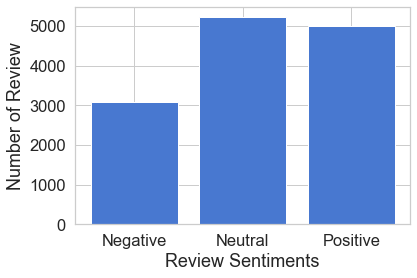

In [9]:
Sentiment_count=df.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['comment'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [10]:
pd.crosstab(index = df['sentiment'], columns="Total count")

col_0,Total count
sentiment,
Negative,3089
Neutral,5221
Positive,5000


In [11]:
X, y = df['comment'], df['sentiment']

##### Text Preprocessing

In [12]:
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
## Change the reviews type to string
df['comment'] = df['comment'].astype(str)

## Lowercase all reviews
df['comment'] = df['comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['comment']

## remove punctuation
df['comment'] = df['comment'].str.replace('[^\w\s]','')
df['comment']

## Stop Words
stop = stopwords.words('french')
df['comment'] = df['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['comment']

## Stemming
st = PorterStemmer()
df['comment'] = df['comment'].apply(lambda x: " ".join([st.stem(word) for word in x.split() if x not in stop]))
df['comment']

1    accueil sympa mal dattent final kebab correct ...
7    laccueil bonn sandwich mauvai plu tromp comman...
1    balad quartier cherchon kebab voici tripadviso...
6    kebab identiqu ailleur cela rest kebab transce...
5    moment où rédige cet avi restaur classé 11eme ...
                           ...                        
5    nest difficil face lelyse remontez rue côté br...
7    vraiment passé excel moment nouveau restaur je...
3    arrivon servic 21h heur laquel réservé dîner a...
1    ici comm leden roc autr hotel group levur chim...
2    excellent pizzaria accueil trè chaleureux pizz...
Name: comment, Length: 13310, dtype: object

##### Converting Text to Numbers

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('french'))
X = vectorizer.fit_transform(df['comment']).toarray()
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

##### TF-IDF using the Scikit-Learn Library

In [14]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('french'))
processed_features = vectorizer.fit_transform(df['comment']).toarray()

##### Train Model + CountVectorizer

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[414 152  57]
 [ 32 941 105]
 [ 19 104 838]]
              precision    recall  f1-score   support

    Negative       0.89      0.66      0.76       623
     Neutral       0.79      0.87      0.83      1078
    Positive       0.84      0.87      0.85       961

    accuracy                           0.82      2662
   macro avg       0.84      0.80      0.81      2662
weighted avg       0.83      0.82      0.82      2662

0.82381667918858


##### Train Model + TF-IDF 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
predictions = text_classifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[410 138  55]
 [ 34 868 116]
 [  5 137 899]]
              precision    recall  f1-score   support

    Negative       0.91      0.68      0.78       603
     Neutral       0.76      0.85      0.80      1018
    Positive       0.84      0.86      0.85      1041

    accuracy                           0.82      2662
   macro avg       0.84      0.80      0.81      2662
weighted avg       0.83      0.82      0.82      2662

0.8178061607813674


In [23]:
from sklearn import model_selection, naive_bayes, svm
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_train)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score = ",accuracy_score(predictions_NB, y_train)*100)

Naive Bayes Accuracy Score =  78.7847483095417


In [24]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_train)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score = ",accuracy_score(predictions_SVM, y_train)*100)

SVM Accuracy Score =  86.82381667918858


##### Ensemble Learning

In [ ]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np 
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, stats.mode([pred1[i], pred2[i], pred3[i]]))

In [35]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

/Users/oorvasisooprayen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/oorvasisooprayen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7385424492862509